In [46]:
import os
import codecs
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

from gensim import corpora
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import dates
from matplotlib import rcParams

from gensim import corpora, models, similarities

import logging, gensim, bz2

In [ ]:
#texts = []
#punctuation = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'"] 
#stop_words = nltk.corpus.stopwords.words('english')
#symbols = set('  #  * ; , / \ ! | #/%'.split())
#for p in file:
#    with codecs.open(p, 'r', encoding='utf-8', errors='ignore') as fdata:
#        contents = fdata.read().lower()
        
#        L = contents.split()
#        texts.append(L)
#        textss=[[i for i in text if i not in stop_words]for text in texts]
#        textss=[[i for i in text if len(i) == len(i.encode())] for text in textss]
#        textss=[[i for i in text if  i not in symbols] for text in textss]

## Reading a saved file of collection of 1259 texts, already undergone some Preprocessing , removing punctuations. stop_words, symbols, removing emoji's like symbols.

In [47]:
import pickle
f = open('my_list.dat', 'rb')
textss = pickle.load(f)

## Further Preprocessing

In [48]:
words=['from','n a','y','x','0%','100%','+60133600366', 'also']
textss=[[i for i in text  if i not in words] for text in textss]

In [49]:
textss=[[i.replace(" ","") for i in aa ]for aa in textss]

In [50]:
textss = [[token for token in doc if not token.isnumeric()] for doc in textss]

In [51]:
page=['p','g','e']

In [52]:
textss=[[i for i in doc if i not in page] for doc in textss]

In [53]:
textss=[[t for t in text if len(t) > 1] for text in textss]

In [59]:
from collections import defaultdict
frequency = defaultdict(int)
for text in textss:
    for token in text:
        frequency[token] += 1

In [56]:
very_common =['red', 'cross','support', 'ifrc','national','activities','operation','volunteers', 'people','emergency']

In [57]:
textss=[[i for i in doc if i not in very_common] for doc in textss]

In [43]:
#textss=[[tok for tok in t if frequency[tok]>0 ]for t in textss]

In [44]:
#frequency

In [12]:
len(textss)

1259

In [60]:
import collections
#stats = {'a':1000, 'b':3000, 'c': 100}
freq = collections.Counter(frequency)
FF=freq.most_common(20)
FF

[('response', 19378),
 ('health', 19200),
 ('total', 18962),
 ('affected', 17983),
 ('water', 16769),
 ('disaster', 15834),
 ('society', 15433),
 ('community', 13096),
 ('hygiene', 12826),
 ('families', 12623),
 ('needs', 12343),
 ('information', 12033),
 ('staff', 12012),
 ('appeal', 10926),
 ('crescent', 10836),
 ('food', 10831),
 ('government', 10778),
 ('international', 10750),
 ('services', 10745),
 ('societies', 10728)]

In [16]:
from collections import Counter
c=Counter( freq ).most_common()[:-20:-1]

In [56]:
c

[('sekovici', 1),
 ('nadroga', 1),
 ('quartiers', 1),
 ('gilberts', 1),
 ('jimbatres@cruzrojaor', 1),
 ('iacrne', 1),
 ('ifrcipa', 1),
 ('vicepresidente', 1),
 ('plugs', 1),
 ('178208kph', 1),
 ('[rru]', 1),
 ('supply1', 1),
 ('rugerero', 1),
 ('displacement5', 1),
 ('discusses', 1),
 ('authorising', 1),
 ('fasher', 1),
 ('volcano`s', 1),
 ('1continuous', 1)]

## Top words in the corpus

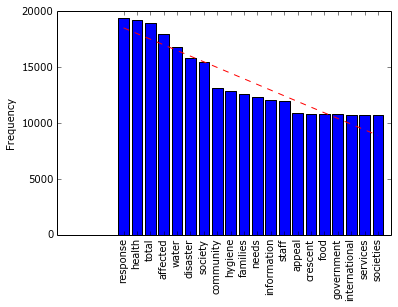

In [61]:
# sort in-place from highest to lowest
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
FF.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
words = list(zip(*FF))[0]
score = list(zip(*FF))[1]
x_pos = np.arange(len(words)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, words, rotation='vertical')
plt.ylabel('Frequency')
plt.show()

## Dictionary of words

In [62]:
dictionary=corpora.Dictionary(textss)

2017-05-22 01:51:01,923 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-05-22 01:51:04,023 : INFO : built Dictionary(51468 unique tokens: ['rcfor', 'ksh', 'mahendranagar', '\x10\x15\x13\x14\x18\x12\x1b', '\x17\x18\x0f\x16\x13\x18']...) from 1259 documents (total 3430818 corpus positions)


In [63]:
corpus = [dictionary.doc2bow(text) for text in textss]

In [20]:
len(corpus[0])

209

In [21]:
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 2),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

## Term frequency inverse document frequency

In [64]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2017-05-22 01:51:15,732 : INFO : collecting document frequencies
2017-05-22 01:51:15,734 : INFO : PROGRESS: processing document #0
2017-05-22 01:51:15,979 : INFO : calculating IDF weights for 1259 documents and 51467 features (1246836 matrix non-zeros)


In [65]:
corpus_tfidf = tfidf[corpus]
#for doc in corpus_tfidf:
     #print(doc)

In [55]:
#lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=30, update_every=1, chunksize=1259, passes=80)

In [56]:
#lda.show_topics(num_topics=30, num_words=10)

In [48]:
#lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, update_every=1, chunksize=1259, passes=80)

2017-05-19 00:42:03,025 : INFO : using symmetric alpha at 0.05
2017-05-19 00:42:03,026 : INFO : using symmetric eta at 1.9425774117098566e-05
2017-05-19 00:42:03,034 : INFO : using serial LDA version on this node
2017-05-19 00:42:13,636 : INFO : running online LDA training, 20 topics, 80 passes over the supplied corpus of 1259 documents, updating model once every 1259 documents, evaluating perplexity every 1259 documents, iterating 50x with a convergence threshold of 0.001000
2017-05-19 00:43:09,598 : INFO : -11.874 per-word bound, 3752.3 perplexity estimate based on a held-out corpus of 1259 documents with 3740017 words
2017-05-19 00:43:09,603 : INFO : PROGRESS: pass 0, at document #1259/1259
2017-05-19 00:43:15,547 : INFO : topic #15 (0.050): 0.017*"red" + 0.012*"cross" + 0.008*"support" + 0.007*"activities" + 0.006*"national" + 0.006*"volunteers" + 0.006*"response" + 0.005*"emergency" + 0.005*"ifrc" + 0.005*"health"
2017-05-19 00:43:15,548 : INFO : topic #2 (0.050): 0.021*"red" + 0.

## Training the Model

In [70]:
lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary,alpha='auto', num_topics=30, update_every=1, chunksize=1259, passes=65)

2017-05-22 03:44:35,132 : INFO : using autotuned alpha, starting with [0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333, 0.033333333333333333]
2017-05-22 03:44:35,133 : INFO : using symmetric eta at 1.9429548457293853e-05
2017-05-22 03:44:35,144 : INFO : using serial LDA version on this node
2017-05-22 03:44:51,249 : INFO : running online LDA training, 30 topics, 65 passes over the supplied corpus of 1259 doc

In [24]:
#lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary,alpha='auto',eta='auto', num_topics=30, update_every=1, chunksize=1259, passes=80)

In [54]:
#lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary,alpha='auto', num_topics=20, update_every=1, chunksize=1259, passes=100)

2017-05-19 07:27:09,462 : INFO : using autotuned alpha, starting with [0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003, 0.050000000000000003]
2017-05-19 07:27:09,464 : INFO : using symmetric eta at 1.9425774117098566e-05
2017-05-19 07:27:09,471 : INFO : using serial LDA version on this node
2017-05-19 07:27:20,299 : INFO : running online LDA training, 20 topics, 100 passes over the supplied corpus of 1259 documents, updating model once every 1259 documents, evaluating perplexity every 1259 documents, iterating 50x with a convergence threshold of 0.001000
2017-05-19 07:28:11,401 : INFO : -11.874 per-word bound, 3752.2 perple

## Topics 

In [71]:
lda.show_topics(30,10)

[(0,
  '0.013*"families" + 0.011*"affected" + 0.009*"health" + 0.007*"water" + 0.006*"actions" + 0.006*"aid" + 0.006*"communities" + 0.005*"total" + 0.005*"community" + 0.005*"san"'),
 (1,
  '0.019*"migrants" + 0.009*"services" + 0.006*"items" + 0.006*"staff" + 0.006*"rfl" + 0.005*"information" + 0.005*"hygiene" + 0.005*"first" + 0.005*"provided" + 0.005*"response"'),
 (2,
  '0.012*"ercs" + 0.008*"sircs" + 0.008*"hygiene" + 0.008*"appeal" + 0.007*"water" + 0.007*"promotion" + 0.007*"response" + 0.006*"camp" + 0.006*"health" + 0.006*"gambella"'),
 (3,
  '0.014*"prc" + 0.012*"affected" + 0.009*"response" + 0.009*"disaster" + 0.008*"items" + 0.008*"families" + 0.007*"needs" + 0.007*"relief" + 0.006*"shelter" + 0.006*"areas"'),
 (4,
  '0.008*"water" + 0.007*"affected" + 0.007*"dref" + 0.007*"needs" + 0.007*"shelter" + 0.007*"target" + 0.006*"distribution" + 0.006*"hygiene" + 0.006*"response" + 0.006*"items"'),
 (5,
  '0.012*"russian" + 0.011*"arcs" + 0.009*"health" + 0.009*"srcs" + 0.006*"

In [68]:
#lda.show_topics(30,10)

In [26]:
#
#lda.show_topics(20,10)

In [72]:
tt=lda.top_topics(corpus, num_words=10)

In [28]:
#lda.top_topics(corpus, num_words=10)

In [73]:
tt

[([(0.010797071933716623, 'water'),
   (0.010237386183797647, 'affected'),
   (0.0084943083921933636, 'families'),
   (0.0081067420265093955, 'society'),
   (0.0073483715480965684, 'food'),
   (0.0070189444509068787, 'hygiene'),
   (0.0060020989694541766, 'disaster'),
   (0.0055002137563421134, 'total'),
   (0.0053938777998619059, 'needs'),
   (0.0051599284562341202, 'local')],
  -3.6048974718118294),
 ([(0.013927406911970345, 'prc'),
   (0.012032526011921471, 'affected'),
   (0.0092962471134771067, 'response'),
   (0.0088459605963634551, 'disaster'),
   (0.0084421297805661894, 'items'),
   (0.0076611543601784581, 'families'),
   (0.0072174496726060298, 'needs'),
   (0.0069298707677591448, 'relief'),
   (0.0061204194065866266, 'shelter'),
   (0.006020415953489947, 'areas')],
  -4.7278610119831637),
 ([(0.014317851265377414, 'shelter'),
   (0.013595427033790238, 'appeal'),
   (0.013301871864925619, 'output'),
   (0.011423224543596559, 'communities'),
   (0.010004571691507655, 'response'

## Creating a table for the topics and words distributions with their probabilities, labels 0-29 for the columns are the topics and the words labels for each row, starting from the second.  For example 0.010237 is the probability of the word 'affected' occuring in topic 0. In all 152 words constitute the domain for the  distribution of words for a particular topic. Cells with NaN entries for a column topic do not constitute the words distribution.

In [74]:
import pandas as pd

In [75]:
L_dict = [{k: v for v, k in L_pairs} for L_pairs, p in tt]

In [76]:
L_series = list(map(pd.Series, L_dict))

In [77]:
data=pd.concat(L_series, axis=1)

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [85]:
data

0         1         2         3         4         5  \
actions        NaN       NaN       NaN       NaN       NaN       NaN         
active         NaN       NaN       NaN       NaN       NaN       NaN         
affected        0.010237  0.012033 NaN        0.007457 NaN       NaN         
africa         NaN       NaN       NaN       NaN       NaN        0.006072   
aid            NaN       NaN       NaN       NaN       NaN       NaN         
allocations    NaN       NaN       NaN       NaN       NaN       NaN         
annual         NaN       NaN       NaN       NaN       NaN       NaN         
appeal         NaN       NaN        0.013595 NaN       NaN       NaN         
arcs           NaN       NaN       NaN       NaN       NaN       NaN         
areas          NaN        0.006020 NaN       NaN       NaN       NaN         
assistance     NaN       NaN       NaN       NaN       NaN       NaN         
bdrcs          NaN       NaN       NaN       NaN       NaN       NaN         
belarus        NaN       NaN       NaN       NaN       NaN       NaN         
beneficiaries  NaN       NaN       NaN       NaN       NaN       NaN         
branches       NaN       NaN       NaN       NaN       NaN       NaN         
budget         NaN       NaN       NaN       NaN       NaN       NaN         
camp           NaN       NaN       NaN       NaN       NaN       NaN         
capacity       NaN       NaN       NaN       NaN       NaN       NaN         
cases          NaN       NaN       NaN       NaN       NaN       NaN         
cash           NaN       NaN       NaN       NaN       NaN       NaN         
chf            NaN       NaN       NaN       NaN       NaN       NaN         
chikungunya    NaN       NaN       NaN       NaN       NaN       NaN         
children       NaN       NaN       NaN       NaN       NaN       NaN         
cholera        NaN       NaN       NaN       NaN       NaN       NaN         
closed         NaN       NaN       NaN       NaN       NaN       NaN         
communities    NaN       NaN        0.011423 NaN       NaN       NaN         
community      NaN       NaN        0.007601 NaN       NaN       NaN         
construction   NaN       NaN       NaN       NaN       NaN       NaN         
contributions  NaN       NaN       NaN       NaN       NaN       NaN         
costs          NaN       NaN       NaN       NaN       NaN       NaN         
counties       NaN       NaN       NaN       NaN       NaN       NaN         
country        NaN       NaN       NaN       NaN       NaN        0.007696   
county         NaN       NaN       NaN       NaN       NaN       NaN         
crescent       NaN       NaN       NaN       NaN       NaN       NaN         
darfur         NaN       NaN       NaN       NaN       NaN       NaN         
development    NaN       NaN       NaN       NaN       NaN       NaN         
disaster        0.006002  0.008846 NaN       NaN       NaN       NaN         
displaced      NaN       NaN       NaN       NaN       NaN       NaN         
distribution   NaN       NaN       NaN        0.006388 NaN       NaN         
district       NaN       NaN       NaN       NaN       NaN       NaN         
districts      NaN       NaN       NaN       NaN       NaN       NaN         
djibouti       NaN       NaN       NaN       NaN       NaN       NaN         
dominican      NaN       NaN       NaN       NaN       NaN       NaN         
donations      NaN       NaN       NaN       NaN       NaN       NaN         
donors         NaN       NaN       NaN       NaN       NaN       NaN         
dref           NaN       NaN       NaN        0.006978 NaN        0.011084   
ebola          NaN       NaN       NaN       NaN       NaN       NaN         
ercs           NaN       NaN       NaN       NaN       NaN       NaN         
expenditure    NaN       NaN       NaN       NaN       NaN       NaN         
families        0.008494  0.007661 NaN       NaN       NaN       NaN         
federation     NaN       NaN       NaN       

In [80]:
#lda.get_document_topics[1]

In [135]:
data.shape

(152, 30)

In [136]:
#data.describe()

## Creating a table for selected topics

In [133]:
mydf = pd.DataFrame({ 
        'Topics' : ['7','9','10','13','14','16','17','18','19','27','28'],#,'3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']     #'Field2' : ['1','2','3'],
      'Words' :[ 
                      [ ('food'), ('cash') ,('appeal'),('security'),
                      ('households'),('children'),('nutrition'),('monitoring'),('beneficiaries'),
                     ('health')],
                      [ ('societies'),('health'),('response'),('disaster'),('relief'),
                     ('items'),('needs'),('families'),('floods'),('dref') ],
            [('rc'),('total'),('report'),('timeframe'),('budget'),('expenditure'),('income'),('funding'),('rcrc'), ('appeal')],
             [('appeal'),('financial'),('statements'),('chf'),('societies'),('expenditure'),('contributions'),('international'),('costs'),('period')],
              [('nrcs'),('districts'),('bdrcs'),('families'),('cash'),('affected'),('shelter'),('water'),('district'),('distribution')],
            
    [('health'),('cases'),('total'),('dref'),('social'),('response'),('outbreak'),('community'),('mobilization'),('vaccination')], 
            
    [('ebola'),('guinea'),('government'),('total'),('community'),('sierrra'),('leone'),('liberia'),('response'),('virus')],         
    [('from'),('private'),('donors'),('line'),('donations'),('total'),('sarc'),('chf'),('society'),('government')],        
     [('krcs'),('county'),('kenya'),('counties'),('total'),('staff'),('affected'),('health'),('nairobi'),('garissa')],    
    [('ircs'),('lrc'),('food'),('rc'),('iraq'),('crescent'),('syrian'),('lebanon'),('mena'),('displaced')],     
    [('health'),('cholera'),('cases'),('community'),('zika'),('prevention'),('information'),('dominican'),('chikungunya'),('outbreak')],
            
                     ]
        }) 
mydf

Topics  \
0   7       
1   9       
2   10      
3   13      
4   14      
5   16      
6   17      
7   18      
8   19      
9   27      
10  28      

                                                                                                        Words  
0   [food, cash, appeal, security, households, children, nutrition, monitoring, beneficiaries, health]         
1   [societies, health, response, disaster, relief, items, needs, families, floods, dref]                      
2   [rc, total, report, timeframe, budget, expenditure, income, funding, rcrc, appeal]                         
3   [appeal, financial, statements, chf, societies, expenditure, contributions, international, costs, period]  
4   [nrcs, districts, bdrcs, families, cash, affected, shelter, water, district, distribution]                 
5   [health, cases, total, dref, social, response, outbreak, community, mobilization, vaccination]             
6   [ebola, guinea, government, total, community, sierrra, leone, liberia, response, virus]                    
7   [from, private, donors, line, donations, total, sarc, chf, society, government]                            
8   [krcs, county, kenya, counties, total, staff, affected, health, nairobi, garissa]                          
9   [ircs, lrc, food, rc, iraq, crescent, syrian, lebanon, mena, displaced]                                    
10  [health, cholera, cases, community, zika, prevention, information, dominican, chikungunya, outbreak]

In [87]:
#pd.set_option('display.max_colwidth', -1)

In [88]:
#lda[f]

In [187]:
#def ME_(f):
#    for f in corpus[:10]:
#        return lda[f]

In [89]:
#ME_(f)

In [198]:
lda.get_document_topics(corpus[1258], minimum_probability=None, minimum_phi_value=None, per_word_topics=False)

[(5, 0.17962486777222578),
 (7, 0.4261599729695118),
 (9, 0.069573737882029363),
 (11, 0.29801645237940011),
 (19, 0.017488758664267797)]

## Documents Topics, the first list is document 1 with topics 0, 1,3 and 23, the last list is the 10th document with topics 3,11,20,25 and 27.

In [92]:
for f in corpus[:10]:
    print(lda[f])

[(0, 0.045046351341113677), (1, 0.41864258085741102), (3, 0.47541620244398913), (23, 0.058883677230283794)]
[(3, 0.93720059022920799), (24, 0.062583356399762771)]
[(1, 0.77600399768037065), (6, 0.011621258772642166), (11, 0.12830192810639754), (25, 0.067010246509487878)]
[(1, 0.77628348365138911), (18, 0.1940000505880661), (23, 0.016228434803060823)]
[(3, 0.97867809015670548), (24, 0.020946275633310502)]
[(4, 0.029408244412399004), (15, 0.019376305198348154), (18, 0.10229196967102919), (20, 0.019108672979429628), (23, 0.42062295683377726), (25, 0.061758238766430856), (27, 0.22416168601181899), (28, 0.11240882304148141)]
[(0, 0.036811331390725538), (3, 0.110686456323682), (4, 0.082992629100735252), (7, 0.1300767908664546), (15, 0.074950871242072933), (18, 0.01998320371018035), (19, 0.043519753884833742), (23, 0.049980176039134967), (24, 0.078686335356744977), (28, 0.35943896229680045)]
[(0, 0.54180251833228554), (4, 0.011469491133458127), (15, 0.42578261447126708)]
[(10, 0.5071671689734

In [94]:
list(sorted(lda.show_topics(num_topics=30)))

[(0,
  '0.013*"families" + 0.011*"affected" + 0.009*"health" + 0.007*"water" + 0.006*"actions" + 0.006*"aid" + 0.006*"communities" + 0.005*"total" + 0.005*"community" + 0.005*"san"'),
 (1,
  '0.019*"migrants" + 0.009*"services" + 0.006*"items" + 0.006*"staff" + 0.006*"rfl" + 0.005*"information" + 0.005*"hygiene" + 0.005*"first" + 0.005*"provided" + 0.005*"response"'),
 (2,
  '0.012*"ercs" + 0.008*"sircs" + 0.008*"hygiene" + 0.008*"appeal" + 0.007*"water" + 0.007*"promotion" + 0.007*"response" + 0.006*"camp" + 0.006*"health" + 0.006*"gambella"'),
 (3,
  '0.014*"prc" + 0.012*"affected" + 0.009*"response" + 0.009*"disaster" + 0.008*"items" + 0.008*"families" + 0.007*"needs" + 0.007*"relief" + 0.006*"shelter" + 0.006*"areas"'),
 (4,
  '0.008*"water" + 0.007*"affected" + 0.007*"dref" + 0.007*"needs" + 0.007*"shelter" + 0.007*"target" + 0.006*"distribution" + 0.006*"hygiene" + 0.006*"response" + 0.006*"items"'),
 (5,
  '0.012*"russian" + 0.011*"arcs" + 0.009*"health" + 0.009*"srcs" + 0.006*"

In [154]:
#[i for i in corpus[:10] ]

In [148]:
#aa=[([(4, 0.26587769091032726), (6, 0.16380194635718703), (7, 0.013207258182538293), (16, 0.48340835849163249), (19, 0.072460251873174855)],1),
#([(4, 0.6127871602721644), (7, 0.38704654236437253)],1),
#([(6, 0.011060632139629583), (13, 0.18736000923606974), (16, 0.79084007214381702)],1),
#([(6, 0.055935389366527158), (16, 0.93473756655427909)],1),
#([(4, 0.48134828365141824), (6, 0.04725321030128396), (7, 0.47113488034381795)],1),
#([(2, 0.091743436354086577), (6, 0.043450779217252419), (7, 0.23245988786637459), (9, 0.025046586194490503), (12, 0.54558894056075635), (19, 0.047890816324876191)],1),
#([(1, 0.11728081832706418), (5, 0.0789939850656768), (7, 0.42429548673954665), (9, 0.081624730573386803), (11, 0.096420830975493602), (12, 0.010626505420107497), (14, 0.056357311739138653), (17, 0.014966983839034369), (19, 0.11045362663156455)],1),
#([(19, 0.99983878068326182)],1),
#([(2, 0.10949609556796835), (3, 0.075464307847487214), (7, 0.026569632257986042), (10, 0.33762779630460388), (12, 0.071069219498205313), (13, 0.2114680043490948), (16, 0.15911274595034214)],1),
#([(4, 0.081752637628014477), (10, 0.36161061121427074), (13, 0.53695421740672733), (19, 0.010230891155436976)],1)]

## Creating a table for the documents topics correspondence.

for easy creation of the table, first of all create a list of list of  documents with their topics 

In [90]:
aa = [lda[f] for f in corpus]

In [100]:
#aa

In [91]:
len(aa)

1259

In [96]:
L_doc = [{k: v for k, v in L_pairs} for L_pairs in aa]

In [97]:
L_serie = list(map(pd.Series, L_doc))

In [98]:
data_2=pd.concat(L_serie, axis=1).fillna(0).T

## Table of the documents topics, the columns labelled "0-29" represents the different topics and the rows label from the second row are the documents from "0-1258".

In [139]:
data_2

0         1         2         3         4         5         6  \
0     0.045060  0.418638  0.000000  0.475405  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.937233  0.000000  0.000000  0.000000   
2     0.000000  0.776006  0.000000  0.000000  0.000000  0.000000  0.011625   
3     0.000000  0.776050  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.978775  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.029465  0.000000  0.000000   
6     0.036757  0.000000  0.000000  0.110738  0.082553  0.000000  0.000000   
7     0.541801  0.000000  0.000000  0.000000  0.011471  0.000000  0.000000   
8     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9     0.000000  0.000000  0.000000  0.111329  0.000000  0.000000  0.000000   
10    0.000000  0.000000  0.000000  0.000000  0.062647  0.000000  0.798111   
11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.278140   
12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
13    0.212796  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14    0.000000  0.000000  0.000000  0.000000  0.060894  0.000000  0.012429   
15    0.000000  0.750836  0.000000  0.000000  0.000000  0.000000  0.000000   
16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
17    0.000000  0.116190  0.000000  0.000000  0.000000  0.000000  0.000000   
18    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.023647   
20    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21    0.000000  0.000000  0.061101  0.000000  0.000000  0.000000  0.358225   
22    0.000000  0.000000  0.000000  0.000000  0.015747  0.000000  0.000000   
23    0.000000  0.000000  0.000000  0.000000  0.000000  0.218712  0.000000   
24    0.000000  0.067050  0.000000  0.000000  0.000000  0.278716  0.050167   
25    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
27    0.000000  0.000000  0.000000  0.911640  0.000000  0.000000  0.000000   
28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
29    0.000000  0.000000  0.450830  0.000000  0.000000  0.000000  0.000000   
30    0.000000  0.000000  0.000000  0.063170  0.177777  0.000000  0.092200   
31    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.023014   
33    0.000000  0.000000  0.000000  0.000000  0.000000  0.067500  0.000000   
34    0.000000  0.000000  0.000000  0.125416  0.000000  0.000000  0.000000   
35    0.028129  0.000000  0.000000  0.012889  0.226447  0.000000  0.000000   
36    0.000000  0.706843  0.000000  0.000000  0.000000  0.000000  0.000000   
37    0.938458  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
38    0.000000  0.000000  0.020318  0.000000  0.053390  0.000000  0.000000   
39    0.000000  0.050749  0.000000  0.000000  0.000000  0.025909  0.000000   
40    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
41    0.000000  0.000000  0.000000  0.000000  0.200230  0.000000  0.000000   
42    0.000000  0.000000  0.000000  0.000000  0.170371  0.000000  0.000000   
43    0.381095  0.000000  0.000000  0.169281  0.000000  0.000000  0.000000   
44    0.311075  0.000000  0.024262  0.000000  0.000000  0.000000  0.000000   
45    0.000000  0.534634  0.000000  0.000000  0.000000  0.000000  0.000000   
46    0.000000  0.893561  0.000000  0.000000  0.000000  0.000000  0.000000   
47    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
48    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.064312   
49    0.000000  0.502908  0.000000  0.000000  0.000000  0.000000  0.000000   
50    0.000000  0.000000  0.000000 

List of list of the documents topics

In [101]:
aa

[[(0, 0.045059706404712289),
  (1, 0.41863839487894894),
  (3, 0.47540453300877211),
  (23, 0.058886177580364588)],
 [(3, 0.93723258754435257), (24, 0.062551359084618188)],
 [(1, 0.77600594018269342),
  (6, 0.011625029007246193),
  (11, 0.12830361488143946),
  (25, 0.067002985573936219)],
 [(1, 0.77604998318079621),
  (18, 0.19391306297624744),
  (23, 0.016678448381670243)],
 [(3, 0.97877539749014097), (24, 0.020848968299875155)],
 [(4, 0.029464788836401568),
  (15, 0.019192160152671892),
  (18, 0.10268201108166894),
  (20, 0.019162253100081485),
  (23, 0.42111181010042337),
  (25, 0.061789343382887711),
  (27, 0.224412517024245),
  (28, 0.11254360352957929)],
 [(0, 0.036757103025605239),
  (3, 0.11073755463098546),
  (4, 0.082553128067316309),
  (7, 0.1300443974000505),
  (15, 0.074740070172022124),
  (18, 0.020665077778526983),
  (19, 0.043557465583240182),
  (23, 0.050315993874483919),
  (24, 0.078464695853328839),
  (28, 0.35940685126599187)],
 [(0, 0.54180068750931698),
  (4, 0.01

## Generating data of topic probabilities of the first 10 documents associated with them.

In [110]:
Doc_names=['Doc1',
 'Doc2',
 'Doc3','Doc4','Doc5','Doc6',
 'Doc7',
 'Doc8','Doc9','Doc10']
 #'CBronte_Jane',
#'CBronte_Professor',
 #'CBronte_Villette']

In [111]:
tpp=np.array([[ 0.045059706404712289,0.41863839487894894,0, 0.47540453300877211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.058886177580364588,0,0,0,0,0,0],
       [ 0,  0,  0,0.93723258754435257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.062551359084618188,0,0,0,0,0],
       [ 0,0.77600594018269342,0,0,0,0,0.011625029007246193,0,0,0,0,0.12830361488143946,0, 0,0,0,0,0,0,0,0,0,0,0,0,0.067002985573936219,0,0,0,0],
       [0,0.77604998318079621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.19391306297624744,0,0,0,0,0.016678448381670243,0,0,0,0,0,0],
       [0,0,0,0.97877539749014097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.020848968299875155,0,0,0,0,0]  ,    
       [0,0,0,0,0.029464788836401568,0,0,0,0,0,0,0,0,0,0, 0.019192160152671892,0,0,0.10268201108166894,0,0.019162253100081485,0,0,0.42111181010042337,0,0.061789343382887711,0,0.224412517024245,0.11254360352957929,0] ,
       [0.036757103025605239,0,0,0.11073755463098546,0.082553128067316309,0,0,0.1300443974000505,0,0,0,0,0,0,0,0.074740070172022124,0,0,0.020665077778526983,0.043557465583240182,0,0,0,0.050315993874483919,0.078464695853328839,0,0,0,0.35940685126599187,0]  ,       
       [0.54180068750931698,0,0,0,0.011470564754954598,0,0,0,0,0,0,0,0,0,0,0.42578203147102572,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  ,  
       [0,0,0,0,0,0,0,0,0,0,0.50718594391085714,0,0,0,0,0,0,0.10851872790463832,0,0,0.38275396703236675,0,0,0,0,0,0,0,0,0]  ,  
        [0,0,0,0.11132864118664026,0,0,0,0,0,0,0,0.685157528801011,0,0,0,0,0,0,0,0,0.010424274420688738,0,0,0,0,0.097960347997939276,0,0.083682591898643077,0,0]  ,
              
       ])

In [112]:
tpp.shape

(10, 30)

In [113]:
tpp

array([[ 0.04505971,  0.41863839,  0.        ,  0.47540453,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.05888618,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.93723259,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.06255136,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.77600594,  0.        ,  0.        ,  0.        ,
         0.        ,  0.01162503,  0.        ,  0

## Plotting a stacked bar graph for the first 10 documents with their associated topic probabilities, each compartmental rectangle for each documents are  different topics.

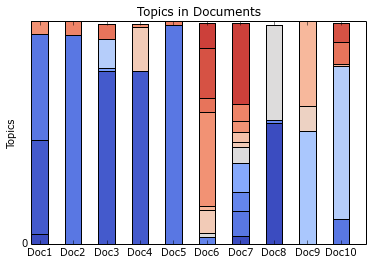

In [141]:
import numpy as np

import matplotlib.pyplot as plt

N, K = tpp.shape  # N documents, K topics

ind = np.arange(N)  # the x-axis locations for the novels

width = 0.5  # the width of the bars

plots = []

height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    p = plt.bar(ind, tpp[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += tpp[:, k]
    plots.append(p)
 

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1


plt.ylabel('Topics')
#Out[20]: <matplotlib.text.Text at 0x2b10d01bbc88>

plt.title('Topics in Documents')
#Out[21]: <matplotlib.text.Text at 0x2b10cffeea90>

plt.xticks(ind+width/2, Doc_names)


plt.yticks(np.arange(0, 1))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

# see http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend for details
# on making a legend in matplotlib
#plt.legend([p[0] for p in plots], topic_labels)


plt.show()

In [299]:
K

20

In [304]:
import pandas as pd

## Heat Graph 

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


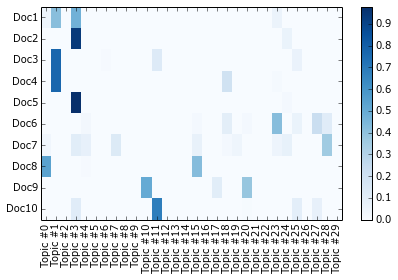

In [118]:
# Ref: http://nbviewer.ipython.org/5427209
# Ref: http://code.activestate.com/recipes/578175-hierarchical-clustering-heatmap-python/
plt.pcolor(tpp, norm=None, cmap='Blues')


# put the major ticks at the middle of each cell
# the trailing semicolon ';' suppresses output
plt.yticks(np.arange(tpp.shape[0])+0.5, Doc_names);

plt.xticks(np.arange(tpp.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)
#Out[31]: (array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

# add a legend
plt.colorbar(cmap='Reds')
#Out[32]: <matplotlib.colorbar.Colorbar at 0x2b10d01f8320>

plt.tight_layout()  # fixes margins

plt.show()

## LDAVIS

In [119]:
import pandas

In [120]:
import pyLDAvis

2017-05-22 10:31:16,243 : INFO : Generating grammar tables from /usr/lib/python3.4/lib2to3/Grammar.txt
2017-05-22 10:31:16,289 : INFO : Generating grammar tables from /usr/lib/python3.4/lib2to3/PatternGrammar.txt


In [121]:
pyLDAvis.enable_notebook()

In [124]:
import pyLDAvis.gensim

In [125]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.4/dist-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
7      10.874263  1        1      -0.088246  0.127046
15     6.425828   1        2       0.059095 -0.040306
0      6.065155   1        3       0.083171  0.001937
20     5.523622   1        4      -0.031288  0.114371
24     5.174138   1        5       0.054734  0.019417
1      5.164985   1        6       0.021566 -0.035881
4      4.642559   1        7       0.077047 -0.029358
28     4.619282   1        8       0.064537  0.006280
23     4.477821   1        9       0.082120 -0.058250
18     4.338226   1        10      0.032409  0.009286
25     4.102991   1        11     -0.068713 -0.134303
3      4.054440   1        12      0.066275 -0.048807
6      4.017722   1        13      0.031421  0.012136
17     3.158325   1        14     -0.050725  0.136340
10     3.123841   1        15      0.056287 -0.011475
27     2.809741   1        16      0.018826  0.020248
19     2.610898   1        17      0.017031  0.096013
11     2.362444   1        18     -0.217509 -0.089687
13     2.305116   1        19      0.008974  0.072306
14     1.980893   1        20      0.054404  0.139173
5      1.840174   1        21      0.053194 -0.021767
9      1.819667   1        22      0.043659  0.009135
26     1.616586   1        23      0.016846 -0.049286
2      1.490767   1        24      0.030468 -0.011172
8      1.276717   1        25      0.055918 -0.030766
12     1.139744   1        26     -0.296878  0.030257
21     0.987166   1        27      0.010679 -0.017712
16     0.955011   1        28      0.051956 -0.018703
29     0.558888   1        29     -0.035130 -0.188125
22     0.482990   1        30     -0.202125 -0.008349, topic_info=      Category          Freq                           Term         Total  \
term                                                                        
43950  Default  7410.000000   from                           7410.000000    
45452  Default  10309.000000  dref                           10309.000000   
19880  Default  9678.000000   ebola                          9678.000000    
519    Default  5558.000000   private                        5558.000000    
39338  Default  6153.000000   donors                         6153.000000    
2567   Default  4899.000000   donations                      4899.000000    
30546  Default  6126.000000   line                           6126.000000    
41833  Default  11004.000000  appeal                         11004.000000   
19380  Default  10670.000000  food                           10670.000000   
10236  Default  16416.000000  water                          16416.000000   
16719  Default  3422.000000   migrants                       3422.000000    
46244  Default  7289.000000   rc                             7289.000000    
21189  Default  4786.000000   guinea                         4786.000000    
24479  Default  2588.000000   prc                            2588.000000    
34218  Default  10629.000000  societies                      10629.000000   
26670  Default  12452.000000  families                       12452.000000   
36477  Default  18911.000000  total                          18911.000000   
18796  Default  17705.000000  affected                       17705.000000   
50389  Default  18846.000000  health                         18846.000000   
4835   Default  9195.000000   shelter                        9195.000000    
35889  Default  10688.000000  crescent                       10688.000000   
29389  Default  7973.000000   chf                            7973.000000    
48774  Default  3177.000000   floods                         3177.000000    
30464  Default  3152.000000   cholera                        3152.000000    
42134  Default  8827.000000   report                         8827.000000    
38515  Default  12588.000000  hygiene                        12588.000000   
5894   Default  5254.000000   financial                      5254.000000 